In [ ]:
pip install xmltodict

In [ ]:
import pandas as pd
import xmltodict
import zipfile
import numpy as np
from matplotlib.dates import DateFormatter
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#latest_data_parsing

<function __main__.latest_data_parsing(zip_path: str = '/content/drive/MyDrive/Classroom/watch8/Haris_iPhone_pro_2_08_2024_native_dump_export.zip', save_csv_path: str = '/content/drive/MyDrive/Classroom/watch8/Haris_iPhone_pro_2_08_2024_native_dump_passthrough_export.csv', save: bool = True) -> pandas.core.frame.DataFrame>

In [ ]:
    zip_path:str = '/content/drive/MyDrive/Classroom/watch8/Haris_iPhone_pro_2_08_2024_native_dump_export.zip'
    with zipfile.ZipFile(zip_path,"r") as zip_ref:
        zip_ref.extractall()

In [ ]:
    input_path = 'apple_health_export/export.xml'
    with open(input_path, 'r') as xml_file:
        input_data = xmltodict.parse(xml_file.read())

In [ ]:
## Selecting only relevant dict keys
records_list = input_data['HealthData']['Record']

In [ ]:
save_csv_path:str = '/content/drive/MyDrive/Classroom/watch8/Haris_iPhone_pro_2_08_2024_native_dump_passthrough_export.csv'

In [ ]:
## Creating and saving csv
df = pd.DataFrame(records_list)
df.to_csv(save_csv_path,index=False, sep=';')


In [ ]:
haris_data = pd.read_csv('/content/drive/MyDrive/Classroom/watch8/Haris_iPhone_pro_2_08_2024_native_dump_passthrough_export.csv',sep=';')

<ipython-input-36-2a659cbf0b58>:1: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  haris_data = pd.read_csv('/content/drive/MyDrive/Classroom/watch8/Haris_iPhone_pro_2_08_2024_native_dump_passthrough_export.csv',sep=';')


In [ ]:
haris_data.tail(1)   # not doing EDA as its already done extensively in my other 3 scripts,   the aim of feature engineering (of my choice / desire) starts ...

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,@device,MetadataEntry,HeartRateVariabilityMetadataList
1139265,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.5,ms,2024-06-28 11:27:15 +0500,2024-06-28 11:26:14 +0500,2024-06-28 11:27:13 +0500,71.6487,"<<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...","{'@key': 'HKAlgorithmVersion', '@value': '2'}",{'InstantaneousBeatsPerMinute': [{'@bpm': '50'...


In [ ]:
haris_data.info    # eating up 165MB of RAM,  well better as of apple native xml's

<bound method DataFrame.info of                                                     @type  \
0                          HKQuantityTypeIdentifierHeight   
1                          HKQuantityTypeIdentifierHeight   
2                        HKQuantityTypeIdentifierBodyMass   
3                        HKQuantityTypeIdentifierBodyMass   
4                       HKQuantityTypeIdentifierHeartRate   
...                                                   ...   
1139261  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139262  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139263  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139264  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139265  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                 @sourceName @sourceVersion      @unit  \
0             Haris’s iPhone         16.3.1         cm   
1                     Health         10.3.1         cm   
2             Haris’s iPhone         16.4.1         kg   
3                     Health         10.3.1         kg   
4        Haris’s Apple Watch            9.5  count/min   
...                      ...            ...        ...   
1139261  Haris’s Apple Watch           10.4         ms   
1139262  Haris’s Apple Watch           10.4         ms   
1139263  Haris’s Apple Watch           10.4         ms   
1139264  Haris’s Apple Watch           10.4         ms   
1139265  Haris’s Apple Watch           10.5         ms   

                     @creationDate                 @startDate  \
0        2023-03-10 23:50:30 +0500  2023-03-10 23:50:30 +0500   
1        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
2        2023-05-26 10:59:57 +0500  2023-05-26 10:59:57 +0500   
3        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
4        2023-05-26 14:05:48 +0500  2023-05-26 14:02:32 +0500   
...                            ...                        ...   
1139261  2024-04-16 19:28:03 +0500  2024-04-16 19:27:02 +0500   
1139262  2024-05-03 08:28:28 +0500  2024-05-03 08:27:27 +0500   
1139263  2024-05-31 13:08:08 +0500  2024-05-31 13:07:07 +0500   
1139264  2024-06-09 20:20:48 +0500  2024-06-09 20:19:47 +0500   
1139265  2024-06-28 11:27:15 +0500  2024-06-28 11:26:14 +0500   

                          @endDate   @value  \
0        2023-03-10 23:50:30 +0500   167.64   
1        2017-04-28 12:00:41 +0500    166.0   
2        2023-05-26 10:59:57 +0500  73.9356   
3        2017-04-28 12:00:41 +0500     80.0   
4        2023-05-26 14:02:32 +0500     80.0   
...                            ...      ...   
1139261  2024-04-16 19:28:02 +0500  50.1356   
1139262  2024-05-03 08:28:26 +0500  68.0076   
1139263  2024-05-31 13:07:27 +0500  53.8915   
1139264  2024-06-09 20:20:47 +0500    32.06   
1139265  2024-06-28 11:27:13 +0500  71.6487   

                                                   @device  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4        <<HKDevice: 0x301da2f80>, name:Apple Watch, ma...   
...                                                    ...   
1139261  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...   
1139262  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...   
1139263  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...   
1139264  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...   
1139265  <<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...   

                                             MetadataEntry  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4        {'@key': 'HKMetadataKeyHeartRateMotionContext'...   
...                                                    ...   
1139261      

In [ ]:
haris_data['@type'].nunique()

41

# for feature engineering (my choice of 41),  i need to do some pre processing

In [ ]:
def haris_data_preprocessing(df: pd.DataFrame, health_data_type: str) -> pd.DataFrame:
    # Filtering selected @type
    df = df[df['@type'] == health_data_type]
    # converting dates to DateTime format
    df['date'] = pd.to_datetime(df['@startDate'],
    format='%Y-%m-%d %H:%M:%S %z',)
    # converting to float32
    df['@value'] =df['@value'].astype('float')
    # Burned Energy by me for per day
    return df.groupby(pd.Grouper(key='date', freq='D'))['@value'].sum().reset_index()
df = haris_data_preprocessing(haris_data,'HKQuantityTypeIdentifierAppleExerciseTime')

<ipython-input-51-c0b4facd12fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['@startDate'],
<ipython-input-51-c0b4facd12fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['@value'] =df['@value'].astype('float')


In [ ]:
df.head()

,date,@value
0,2023-05-26 00:00:00+05:00,14.0
1,2023-05-27 00:00:00+05:00,110.0
2,2023-05-28 00:00:00+05:00,89.0
3,2023-05-29 00:00:00+05:00,93.0
4,2023-05-30 00:00:00+05:00,119.0


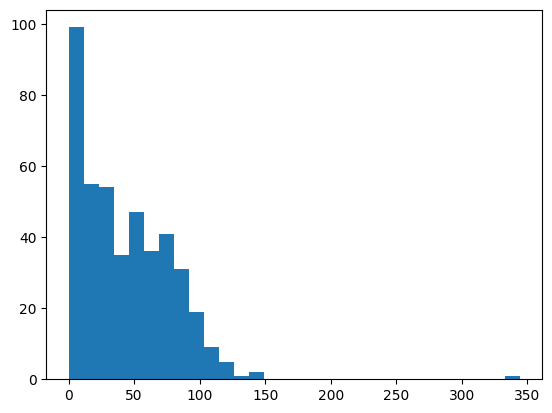

In [ ]:
plt.hist(df['@value'],bins=30)
plt.savefig('histogram.png', transparent=False)

In [ ]:
print(df.date.min(),df.date.max())  # checking start to end date,   i can also see in my phone,  for notebook purpose

2023-05-26 00:00:00+05:00 2024-08-02 00:00:00+05:00


# the very first time i played my #watch7, 2023-05-26

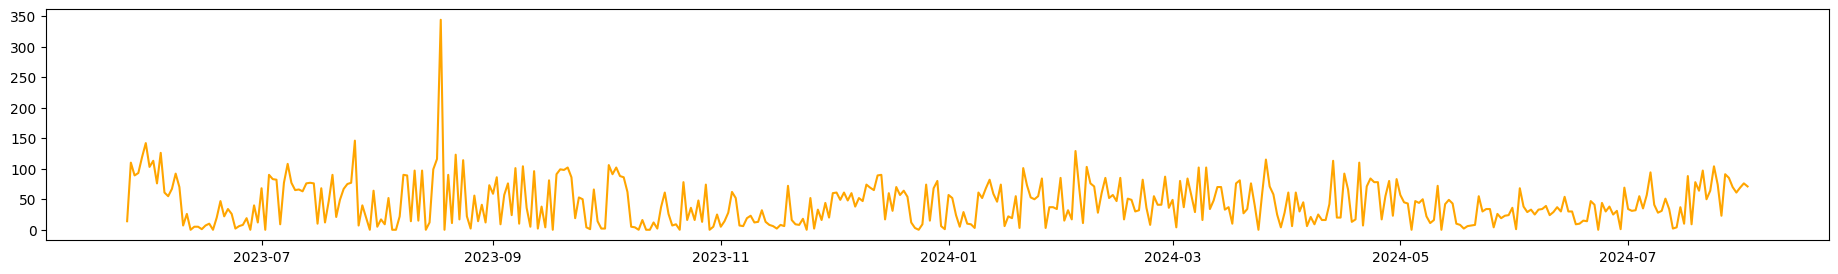

In [ ]:
date_form = DateFormatter("%d-%b")
fig, ax = plt.subplots(figsize=(23, 3))
plt.plot(df.date,df['@value'], color='orange')

In [ ]:
def qa_feature_engineering(df: pd.DataFrame, target_name: str) -> pd.DataFrame:
    shift_df = df[target_name]
    for lag in [1, 2, 7, 14]:
        df[f"lag_{lag}"] = shift_df.shift(lag).values

    for window in [1, 2, 7, 14, 28]:
        for agg in ['mean', 'min', 'max','std']:
            df[f"r{agg}_1_{window}"] = shift_df.shift(1).rolling(window).agg(agg).values
    # Date                                         # f's
    df['day'] = df.date.dt.day
    df['weekday'] = df.date.dt.weekday
    df['month'] = df.date.dt.month
    df['year'] = df.date.dt.year
    # Encoading . . . .  . .
    df["month_cos"] = np.cos(df["month"] * 2 * np.pi / 12).astype("float16")
    df["month_sin"] = np.sin(df["month"] * 2 * np.pi / 12).astype("float16")
    seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]  # f's
    month_to_season = dict(zip(range(1,13), seasons))
    df['season'] = df.date.dt.month.map(month_to_season)
    return df

In [ ]:
appleaxercisetime_df = qa_feature_engineering(df, target_name='@value')

In [ ]:
appleaxercisetime_df.head(1)

,date,@value,lag_1,lag_2,lag_7,lag_14,rmean_1_1,rmin_1_1,rmax_1_1,rstd_1_1,...,rmin_1_28,rmax_1_28,rstd_1_28,day,weekday,month,year,month_cos,month_sin,season
0,2023-05-26 00:00:00+05:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26,4,5,2023,-0.866211,0.5,2


<ipython-input-91-94953e7da520>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='@value',y='year',data=appleaxercisetime_df.groupby('year')['@value'].sum().reset_index(),orient='horizontal',palette='GnBu')


Text(0.5, 1.0, 'exercise duration (min) per year ')

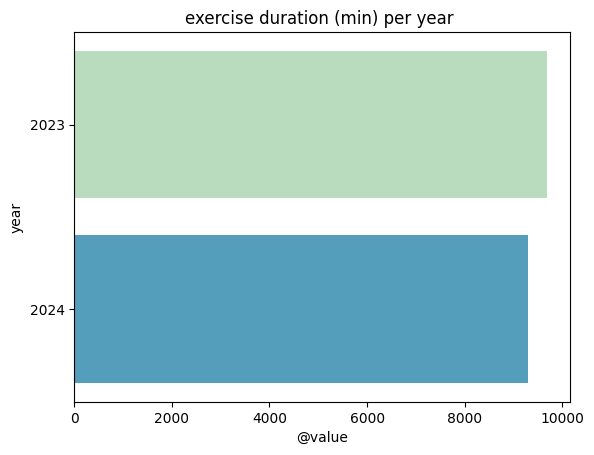

In [ ]:
sns.barplot(x='@value',y='year',data=appleaxercisetime_df.groupby('year')['@value'].sum().reset_index(),orient='horizontal',palette='GnBu')
plt.title('exercise duration (min) per year ')

<ipython-input-95-76b2fc5174d6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='@value',y='weekday',data=appleaxercisetime_df.groupby('weekday')['@value'].sum().reset_index(),orient='horizontal',palette='GnBu')


Text(0.5, 1.0, 'Sum of exercise minutes / weekly')

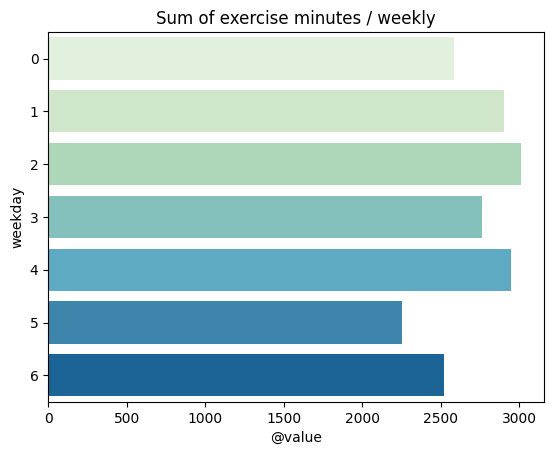

In [ ]:
sns.barplot(x='@value',y='weekday',data=appleaxercisetime_df.groupby('weekday')['@value'].sum().reset_index(),orient='horizontal',palette='GnBu')
plt.title('Sum of exercise minutes / weekly')

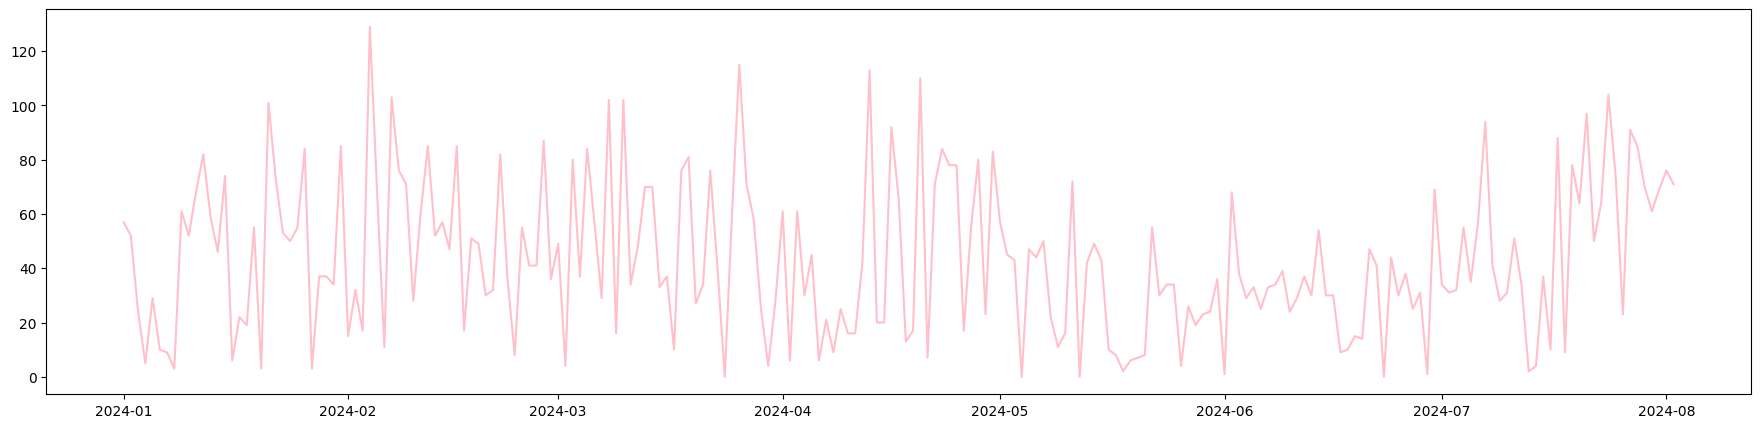

In [ ]:
date_form = DateFormatter("%d-%b")
df_plot = appleaxercisetime_df.loc[df.year == 2024]
fig, ax = plt.subplots(figsize=(22, 5))
plt.plot(df_plot.date,df_plot['@value'], color='pink')

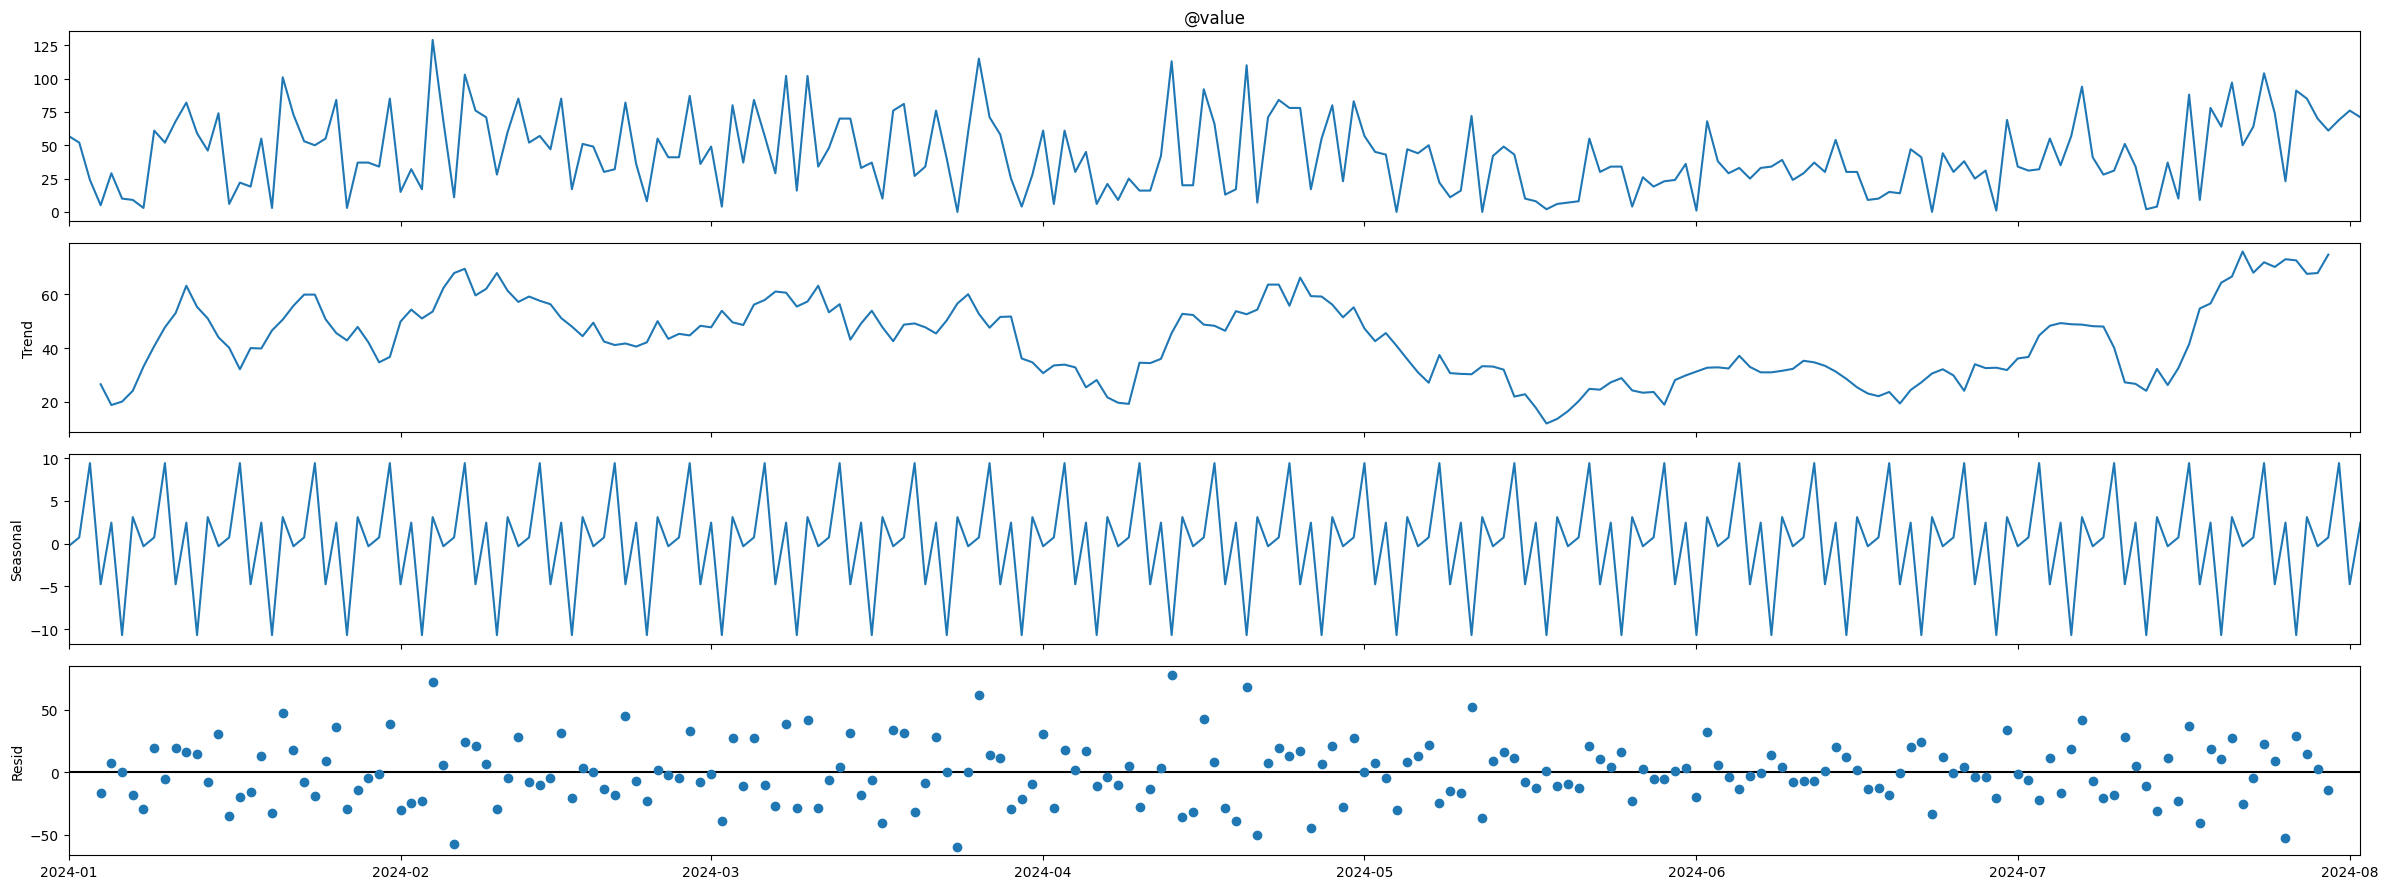

In [ ]:
#filtering was returning error, so copied in another df
filtered = df.loc[appleaxercisetime_df.year == 2024].copy()
filtered = filtered.sort_values('date').set_index('date')
filter_done = sm.tsa.seasonal_decompose(filtered['@value'], model='additive')
fig = filter_done.plot()
fig.set_size_inches((24, 9))
fig.tight_layout()
plt.show()

In [ ]:
# moving on ..... @ haris_data